In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
df = pd.read_csv('data/styles.csv', error_bad_lines=False)

In [3]:
bw_img = np.load('data/bw_array.npy')

In [4]:
all_img = np.load('data/image_array.npy')

In [4]:
from subset_df import wearable_subset, top2_subset

In [5]:
df1, bw_img1 = wearable_subset(df, bw_img)

In [6]:
df2, bw_img2 = top2_subset(df, bw_img)

In [7]:
df_cut = df1[0:3000].copy()
bw_img_cut = bw_img1[0:3000].copy()

In [8]:
df_cut2 = df2[0:3000].copy()
bw_img_cut2 = bw_img2[0:3000].copy()

In [9]:
from sklearn.cluster import AgglomerativeClustering

In [10]:
three_clust = AgglomerativeClustering(n_clusters=3).fit(bw_img_cut)

In [11]:
df_cut.loc[:,'Cluster_Number'] = three_clust.labels_

In [12]:
df_cut.loc[:, 'Category_Number'] = df_cut['masterCategory'].apply(lambda x: 0 if x =='Apparel' else (1 if x=='Accessories' else 2))

In [13]:
clust_by_cat = []
for x in range(3):
    w = df_cut[df_cut['Category_Number']==x].groupby('Cluster_Number').count()['masterCategory'].values
    clust_by_cat.append(w)
clust_by_cat

[array([269, 944, 259]), array([133, 579, 135]), array([128, 421, 132])]

In [14]:
pivot_df = pd.DataFrame(clust_by_cat, index=['Apparel','Accessories', 'Footwear'], columns=['Cluster 1', 'Cluster 2', 'Cluster 3'])

In [15]:
piv_df = pivot_df.transpose()
piv_df

,Apparel,Accessories,Footwear
Cluster 1,269,133,128
Cluster 2,944,579,421
Cluster 3,259,135,132


In [16]:
pct_df = (100 * pivot_df / pivot_df.sum(axis=0)).round(2).transpose()
pct_df

,Apparel,Accessories,Footwear
Cluster 1,50.75,25.09,24.15
Cluster 2,48.56,29.78,21.66
Cluster 3,49.24,25.67,25.10


In [17]:
x_pos = pd.DataFrame([[80, 285, 425],[500, 1250, 1750 ],[85, 288, 422]])

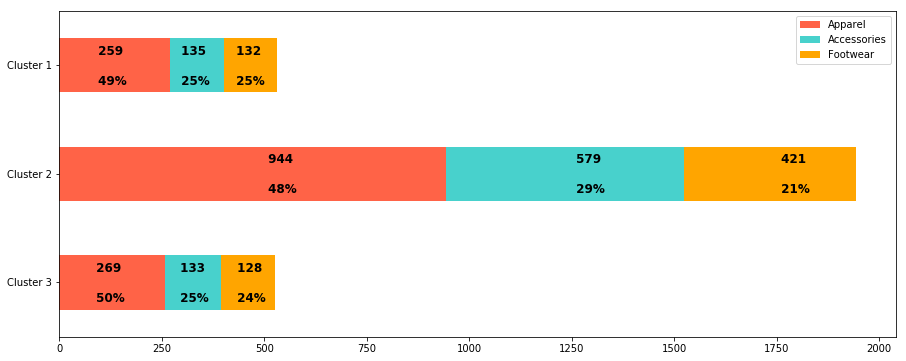

In [18]:
ax = piv_df.loc[ ['Cluster 3','Cluster 2', 'Cluster 1'], :].plot.barh(stacked=True, figsize=(15,6), color=['#FF6347','#48D1CC','#FFA500'])
for row in range(3):
    for col in range(3):
        ax.text(x=x_pos.iloc[row,col], y=row-.18 , s=' {0} \n \n {1}%'.format(piv_df.iloc[row,col],int(pct_df.iloc[row,col])), fontsize=12, fontweight='bold')



In [19]:
two_clust = AgglomerativeClustering(n_clusters=2).fit(bw_img_cut2)

In [20]:
df_cut2.loc[:,'Cluster_Number'] = two_clust.labels_
df_cut2.loc[:, 'Category_Number'] = df_cut2['masterCategory'].apply(lambda x: 0 if x =='Apparel' else 1)

In [21]:
clust_by_cat2 = []
for x in range(3):
    w = df_cut2[df_cut2['Category_Number']==x].groupby('Cluster_Number').count()['masterCategory'].values
    clust_by_cat2.append(w)
clust_by_cat2

[array([928, 964]), array([517, 591]), array([], dtype=int64)]